In [1]:
import pandas as pd
import math
import matplotlib.pyplot as ply
%matplotlib inline

## Preparing the dataframe

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.drop(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis = 1)
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
...,...,...,...
886,887,0,27.0
887,888,1,19.0
888,889,0,NaN
889,890,1,26.0


In [4]:
df = df.head(40)  # taking the first 40 entries for regression
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
5,6,0,NaN
6,7,0,54.0
7,8,0,2.0
8,9,1,27.0
9,10,1,14.0


In [5]:
length = len(df.index)
length

40

In [6]:
df = df.dropna()  # removing NaN values
df

,PassengerId,Survived,Age
0,1,0,22.0
1,2,1,38.0
2,3,1,26.0
3,4,1,35.0
4,5,0,35.0
6,7,0,54.0
7,8,0,2.0
8,9,1,27.0
9,10,1,14.0
10,11,1,4.0


## Extracting needed data and initial calculation

In [7]:
# We will preform logistic regression with Probability of survival vs Age

X = []   # list to store the Age
for i in range(length):
    try:
        X.append(df.Age[i])
    except:
        pass
X

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 31.0,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 19.0,
 40.0,
 66.0,
 28.0,
 42.0,
 21.0,
 18.0,
 14.0]

In [8]:
# calculation of probability of survival to find the odds 
tot = len(df.index)
survived = 0
for i in range(length):
    try:
        if df.Survived[i] == 1:
            survived += 1
    except:
        pass
prob_survive = survived / tot
prob_survive

0.41935483870967744

In [9]:
# The sigmoid function can be linearised plotting graph of natural log odds vs Age
# Then we calculate slope and intercept for this graph. Here the model is   Y = mX + c

Y = []      # holds log odds 

# Next we calculate the odds and then ln(odds) which is appended to Y
# This linearises the problem so we can find slope and intercept and then transform to a sigmoid function

for i in range(length):
    try:
        if df.Survived[i] == 1:
            odds = prob_survive / (1-prob_survive)
        else:
            odds = (1-prob_survive) / prob_survive
        Y.append(math.log(odds))
    except:
        pass
Y

[0.3254224004346278,
 -0.32542240043462783,
 -0.32542240043462783,
 -0.32542240043462783,
 0.3254224004346278,
 0.3254224004346278,
 0.3254224004346278,
 -0.32542240043462783,
 -0.32542240043462783,
 -0.32542240043462783,
 -0.32542240043462783,
 0.3254224004346278,
 0.3254224004346278,
 0.3254224004346278,
 -0.32542240043462783,
 0.3254224004346278,
 0.3254224004346278,
 0.3254224004346278,
 -0.32542240043462783,
 -0.32542240043462783,
 -0.32542240043462783,
 0.3254224004346278,
 -0.32542240043462783,
 0.3254224004346278,
 0.3254224004346278,
 0.3254224004346278,
 0.3254224004346278,
 0.3254224004346278,
 0.3254224004346278,
 0.3254224004346278,
 -0.32542240043462783]

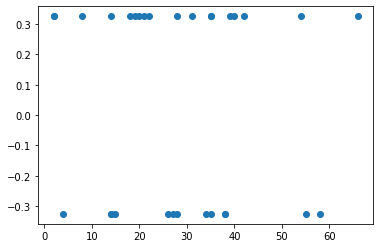

In [10]:
# plotting natural log odds vs age (points)
ply.scatter(X,Y)
#linear regression technique will be used here

## Finding Slope and Intercept

In [11]:
# assuming m and c values
m = 0
c = 0

In [12]:
# performing m and c calculations like in linear regression

# function for gradient descend
def descend(curr, y_pred, Y, x = [1.0 for k in range(len(Y))]):
    for j in range(len(Y)):
        curr -= (0.01/len(Y)) * (y_pred[j] - Y[j]) * x[j]
    return curr

# iterating to perform gradient descend
for i in range(100):     # 100 iterations to calculate m and c
    y_pred = [m * x_val for x_val in X]
    m = descend(m, y_pred, Y, X)
    c = descend(c, y_pred, Y)

In [13]:
m    # final m value

-4.21028124733765e+95

In [14]:
c    # final c value

-1.1215548354430103e+94

In [15]:
y_final = [m * x_val + c for x_val in X]   # final prediction of natural log odds
y_final

[-9.273834292497261e+96,
 -1.6010284288237502e+97,
 -1.095794679143232e+97,
 -1.4747199914036206e+97,
 -1.4747199914036206e+97,
 -2.2746734283977744e+97,
 -8.532717978219601e+95,
 -1.1378974916166087e+97,
 -5.905609294627141e+96,
 -1.6953280472894902e+96,
 -2.4430846782912803e+97,
 -8.431778043029731e+96,
 -1.6431312412971267e+97,
 -5.905609294627141e+96,
 -2.3167762408711507e+97,
 -8.532717978219601e+95,
 -1.3063087415101147e+97,
 -1.4747199914036206e+97,
 -1.4326171789302441e+97,
 -6.326637419360906e+96,
 -1.1800003040899852e+97,
 -3.3794405462245503e+96,
 -1.6010284288237502e+97,
 -8.0107499182959665e+96,
 -1.6852340537705032e+97,
 -2.7799071780782922e+97,
 -1.1800003040899852e+97,
 -1.769439678717256e+97,
 -8.852806167763496e+96,
 -7.589721793562201e+96,
 -5.905609294627141e+96]

## Transformation to Sigmoid function representing probability

In [16]:
# transform the log odds values of the prediction to sigmoid for probability
probability_calc = [1/(1+math.exp(-1.0*z)) for z in y_final]
probability_calc

OverflowError: math range error

NameError: name 'probability_calc' is not defined

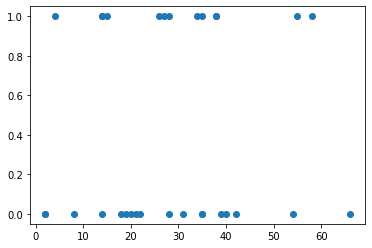

In [17]:
outcome_actual = []   # storing the actual outcome for plotting the sigmoid graph
for i in range(length):
    try:
        outcome_actual.append(df.Survived[i])
    except:
        pass
ply.scatter(X,outcome_actual)   # plotting the data points
ply.plot(X,probability_calc)        # plotting of the probability function